In [35]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, StratifiedKFold
df = pd.read_csv('heart.csv')
df[0:60]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [36]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: >

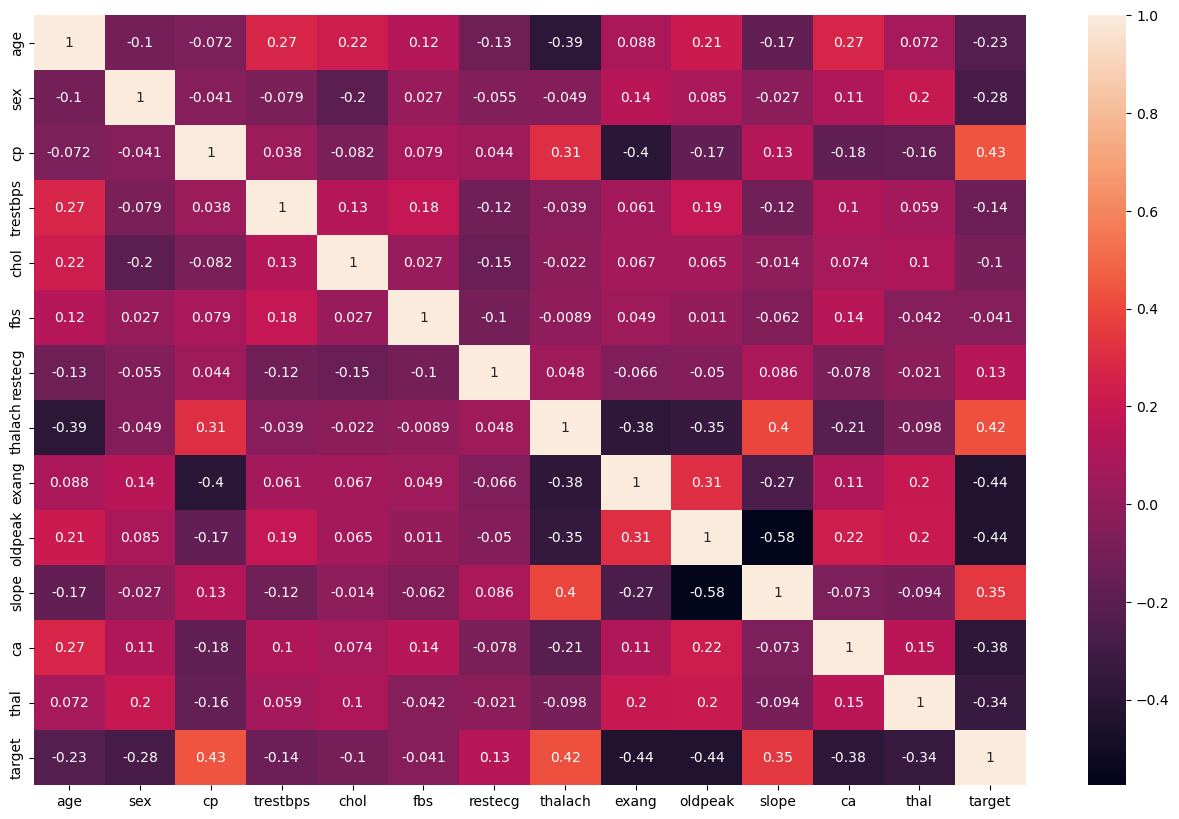

In [38]:
plt.figure(figsize=(16,10))

sns.heatmap(data=df.corr() ,annot=True)

In [39]:
x = df.drop('target',axis =1)
y = df['target']

In [40]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


1    526
0    499
Name: target, dtype: int64


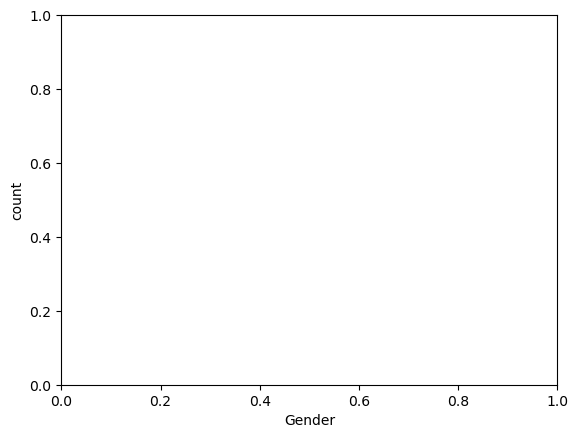

In [41]:
count = df.target.value_counts()
print(count)
plt.xlabel("Gender")
plt.ylabel("count")
plt.show()

In [42]:
print('Percentage of patience without heart problem :'+str(y.where(y==0).count()*100/303))
print('Percentage of patience with heart problem :'+str(y.where(y==1).count()*100/303))


Percentage of patience without heart problem :164.68646864686468
Percentage of patience with heart problem :173.59735973597358


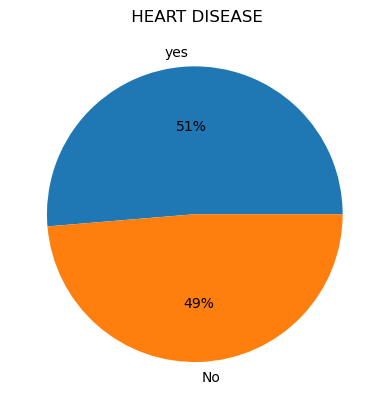

In [43]:
labels = ['yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title(' HEART DISEASE')
plt.show()

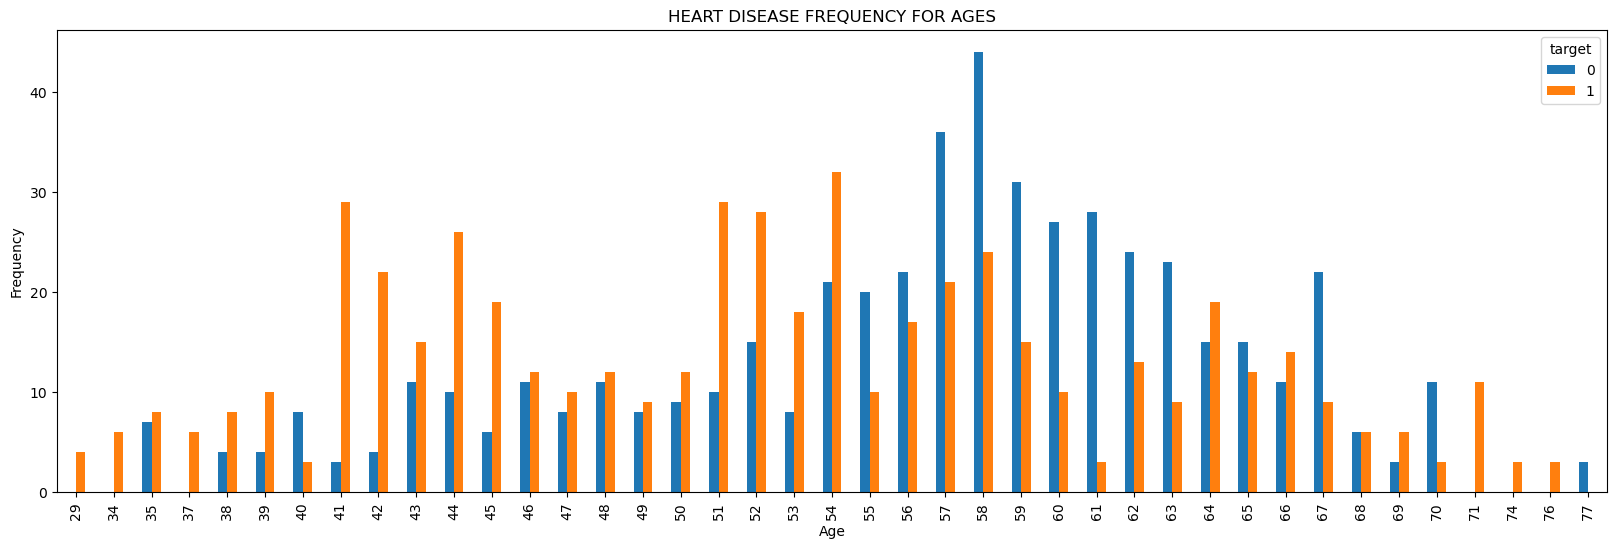

In [44]:
pd.crosstab(df['age'],df['target']).plot(kind="bar",figsize=(20,6))
plt.title('HEART DISEASE FREQUENCY FOR AGES')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [45]:
df['sex'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='sex', ylabel='target'>

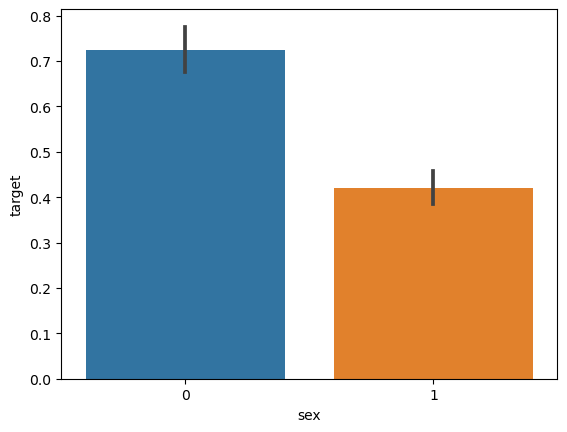

In [46]:
df['sex'] = df['sex']
sns.barplot(x=df['sex'],y=df['target'],data=df)

In [47]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

<Axes: xlabel='cp', ylabel='target'>

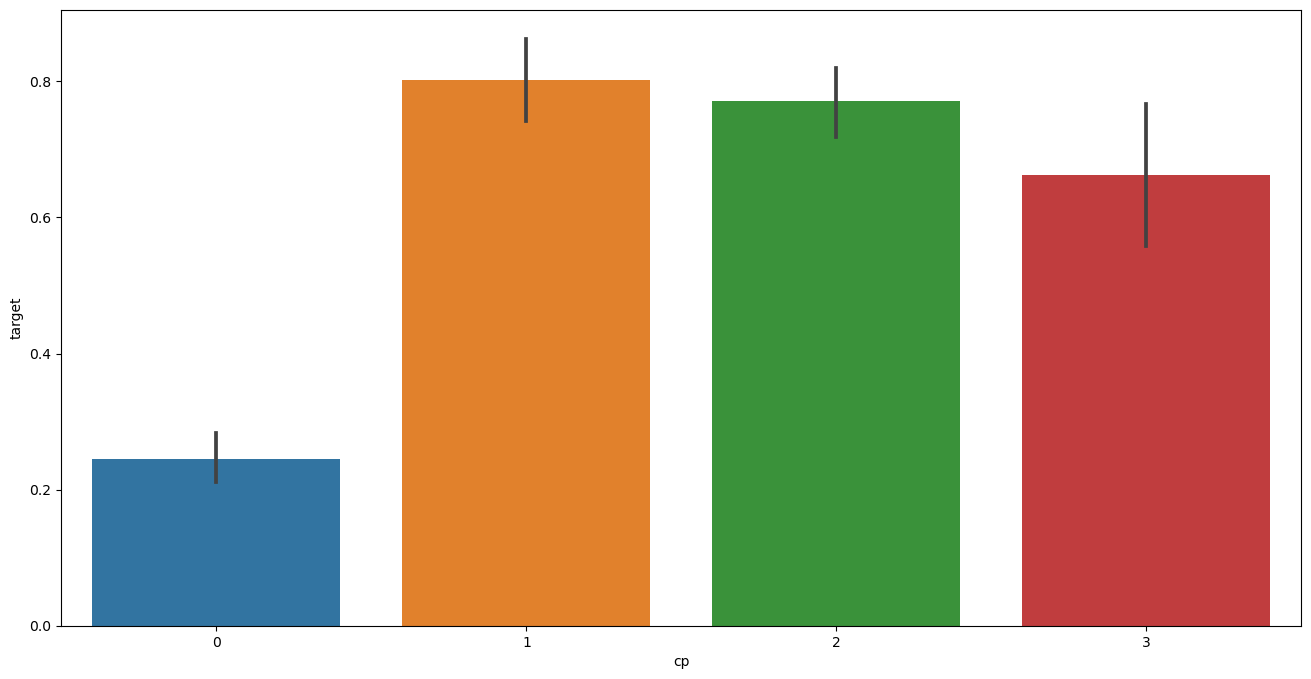

In [48]:
plt.figure(figsize=(16,8))
sns.barplot(x=df['cp'],y=y)

Text(0.5, 1.0, 'plot on relation between maximum heart rate and chest pain type with respect to gender')

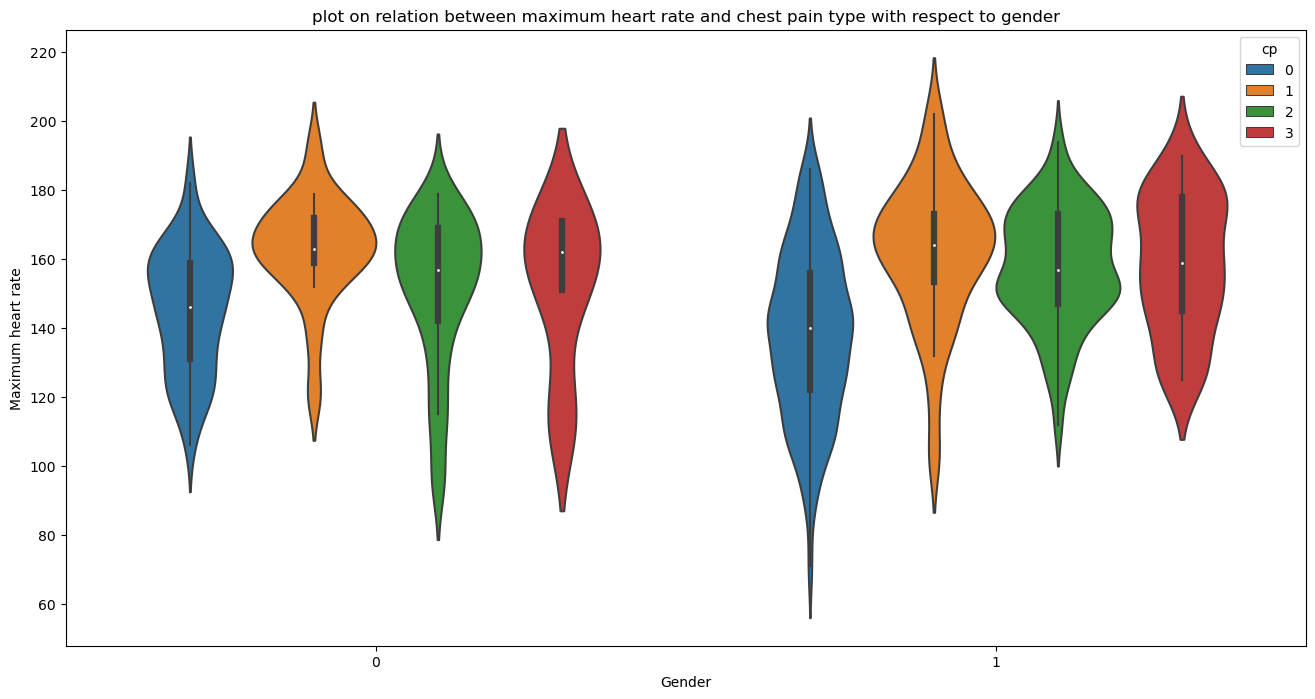

In [49]:
plt.figure(figsize=(16,8))
sns.violinplot(x="sex", y="thalach",hue="cp", data=df,cmap=["BuPy"])
plt.xlabel('Gender')
plt.ylabel('Maximum heart rate')
plt.title("plot on relation between maximum heart rate and chest pain type with respect to gender")

In [50]:
df['restecg'].unique()

array([1, 0, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='target'>

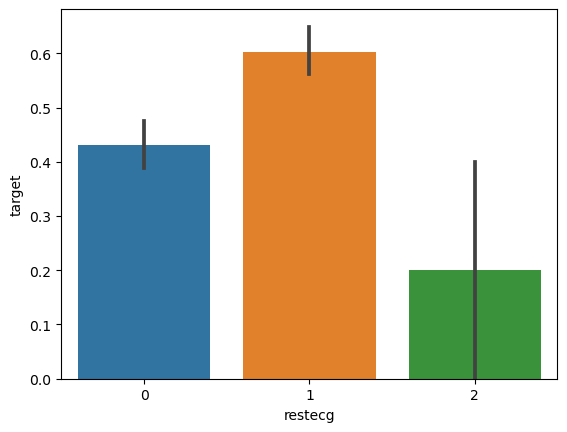

In [51]:
sns.barplot(x=df['restecg'],y=y)

Text(0.5, 1.0, 'plot on relation between maximum heart rate and chest pain type with respect to gender')

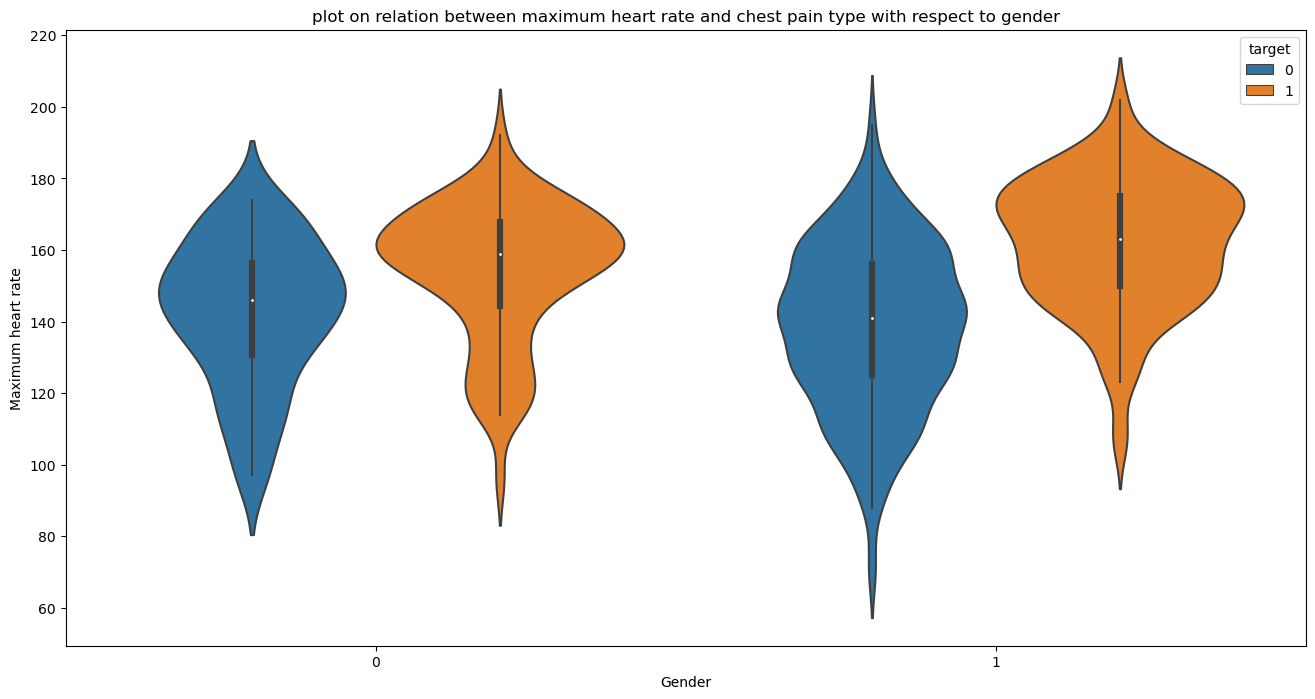

In [52]:
plt.figure(figsize=(16,8))
sns.violinplot(x="sex", y="thalach",hue="target", data=df,cmap=["BuPy"])
plt.xlabel('Gender')
plt.ylabel('Maximum heart rate')
plt.title("plot on relation between maximum heart rate and chest pain type with respect to gender")

In [53]:
df['thalach'].unique()

array([168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 136, 192, 156,
       142, 109, 162, 165, 148, 172, 173, 146, 179, 152, 117, 115, 112,
       163, 147, 182, 105, 150, 151, 169, 166, 178, 132, 160, 123, 139,
       111, 180, 164, 202, 157, 159, 170, 138, 175, 158, 126, 143, 141,
       167,  95, 190, 118, 103, 181, 108, 177, 134, 120, 171, 149, 154,
       153,  88, 174, 114, 195, 133,  96, 124, 131, 185, 194, 128, 127,
       186, 184, 188, 130,  71, 137,  99, 121, 187,  97,  90, 129, 113],
      dtype=int64)

In [54]:
df['thalach'].median()

152.0

In [55]:
df['slope'].unique()

array([2, 0, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='target'>

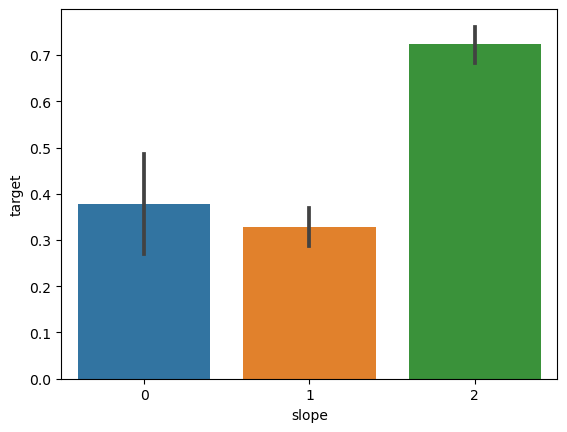

In [56]:
sns.barplot(x=df['slope'],y=y)

Text(0.5, 1.0, 'plot on relation between maximum heart rate and chest pain type with respect to gender')

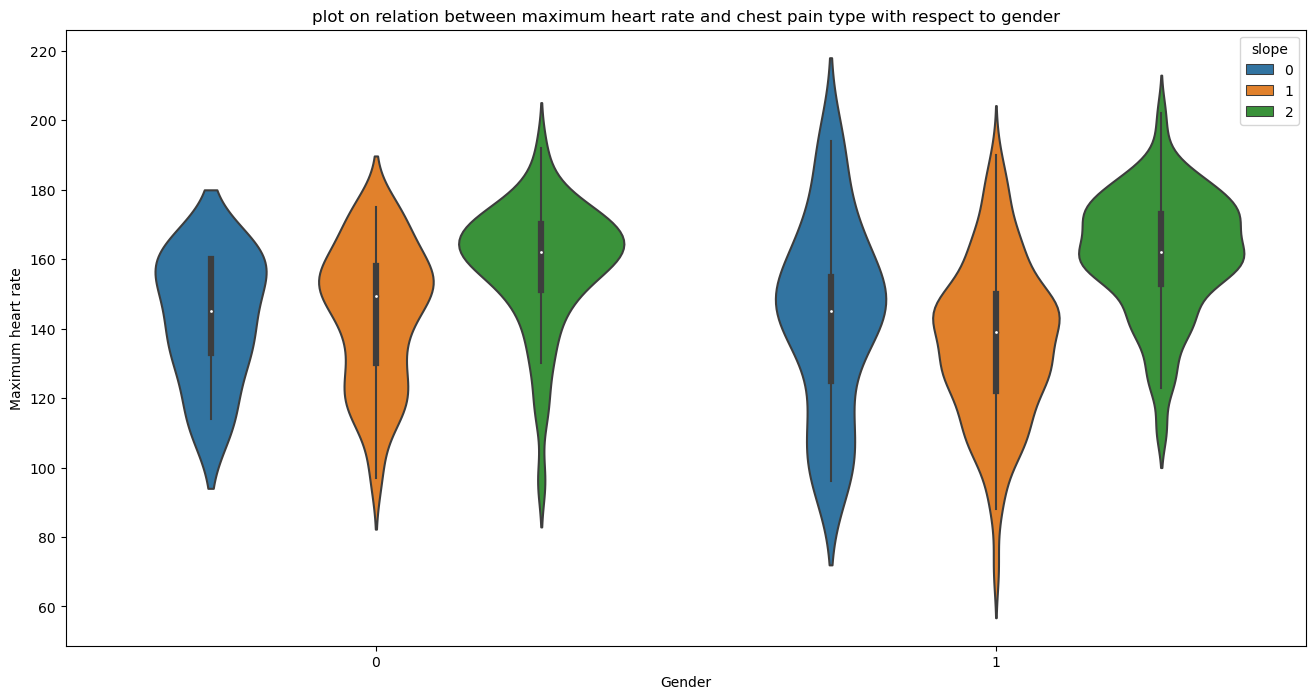

In [57]:
plt.figure(figsize=(16,8))
sns.violinplot(x="sex", y="thalach",hue="slope", data=df,cmap=["BuPy"])
plt.xlabel('Gender')
plt.ylabel('Maximum heart rate')
plt.title("plot on relation between maximum heart rate and chest pain type with respect to gender")

In [58]:
df['chol'].median()

240.0

<Axes: ylabel='Frequency'>

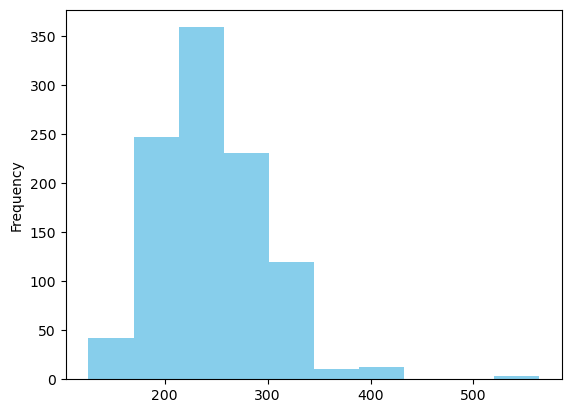

In [59]:
df['chol'].plot.hist(bins = 10, color = 'skyblue')

In [60]:
dataset = pd.get_dummies(df,columns =['sex','cp','fbs','restecg','exang','slope','ca','thal'])


In [64]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler().fit(X=x_train)
scl.scale_


array([ 9.08797163,  0.45508704,  1.04656239, 17.58297443, 48.29209844,
        0.3617251 ,  0.51886594, 22.70794583,  0.4718953 ,  1.14051672,
        0.6137885 ,  1.05697477,  0.60906413])

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.3, random_state= 42)

In [66]:
x_test.shape

(308, 13)

In [67]:
x_train.shape

(717, 13)

In [68]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y,predict_y)

    A = (((C.T)/(C.sum(axis=1))).T)

    B = (C/C.sum(axis=0))

    plt.figure(figsize=(20,4))

    labels = [0,1]

    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap,fmt=".3f",xticklabels=lables,yticklabels=lables)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    plt.subplot(1, 3, 3)

    sns.heatmap(A, annot=True, cmap=cmap,fmt=".3f",xticklabels=lables,yticklabels=lables)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.show()
    


c:\Users\Mohammad Afreen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mohammad Afreen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Accuracy in train: 0.8661087866108786
Accuracy in test: 0.8051948051948052
Precision in train: 0.8369304556354916
Precision in test: 0.751412429378531
Recall in train: 0.9257294429708223
Recall in test: 0.8926174496644296
Log loss: 7.021490919957888
CV Accuracy in train: 84.93687% (3.32366%)
CV Accuracy in test: 81.84030% (3.18750%)


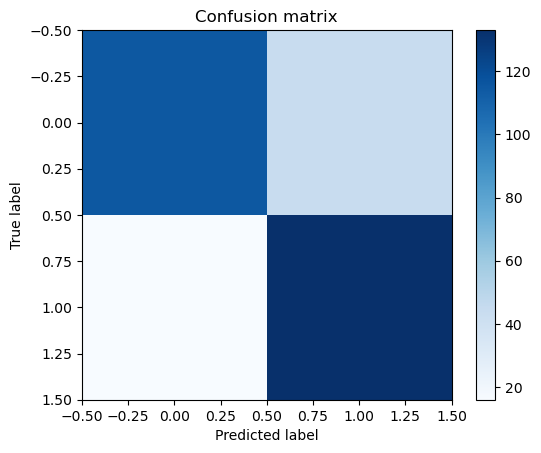

In [80]:
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

max_accuracy = 0
for X in range(60):
    classifier = LogisticRegression(random_state=X)
    classifier.fit(x_train, y_train)
    cur_acc = metrics.accuracy_score(y_test, classifier.predict(x_test))
    if cur_acc > max_accuracy:
        max_accuracy = cur_acc
        best_x = X

params = {"C": np.arange(0.1, 1)}
classifier = LogisticRegression(random_state=best_x, max_iter=30000)
model = GridSearchCV(
    estimator=classifier,
    param_grid=params,
    cv=10,
    verbose=10,
    n_jobs=-1,
    scoring="accuracy"
)

model.fit(x_train, y_train)
prediction = model.predict(x_test)

print('Accuracy in train:', metrics.accuracy_score(y_train, model.predict(x_train)))
print('Accuracy in test:', metrics.accuracy_score(y_test, prediction))

print('Precision in train:', precision_score(y_train, model.predict(x_train)))
print('Precision in test:', precision_score(y_test, prediction))

print('Recall in train:', recall_score(y_train, model.predict(x_train)))
print('Recall in test:', recall_score(y_test, prediction))

print('Log loss:', metrics.log_loss(y_test, prediction))

accuracy_score(y_train, model.predict(x_train))

result_train = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=5, scoring="accuracy")
print("CV Accuracy in train: %.5f%% (%.5f%%)" % (result_train.mean()*100.0, result_train.std()*100.0))

result_test = cross_val_score(estimator=classifier, X=x_test, y=y_test, cv=5, scoring="accuracy")
print("CV Accuracy in test: %.5f%% (%.5f%%)" % (result_test.mean()*100.0, result_test.std()*100.0))

# Plot confusion matrix
cm = confusion_matrix(y_test, prediction)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Fitting 10 folds for each of 28 candidates, totalling 280 fits


c:\Users\Mohammad Afreen\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy in train (SVM): 0.8465829846582985
Accuracy in test (SVM): 0.7857142857142857
Precision in train (SVM): 0.828009828009828
Precision in test (SVM): 0.7426900584795322
Recall in train (SVM): 0.8938992042440318
Recall in test (SVM): 0.8523489932885906
Log loss (SVM): 7.723640011953675
CV Accuracy in train (SVM): 69.03555% (3.16452%)
CV Accuracy in test (SVM): 68.86304% (5.28044%)


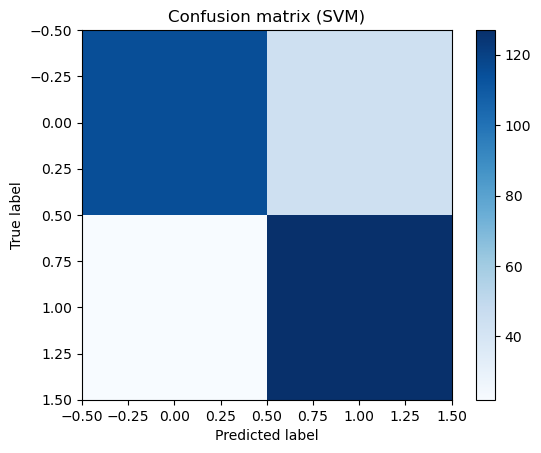

In [94]:
from sklearn import svm

# Define parameters for SVM
params_svm = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],  
    "degree": np.arange(1, 15, 2),
    "C": np.arange(0.1, 1)
}

# Initialize SVM classifier
classifier_svm = svm.SVC(max_iter=30000)

# Initialize GridSearchCV for SVM
model_svm = GridSearchCV(
    estimator=classifier_svm,
    param_grid=params_svm,
    cv=10,
    verbose=10,
    n_jobs=-1,
    scoring="accuracy"
)

# Fit SVM model to training data
model_svm.fit(x_train, y_train)

# Make predictions using the best SVM model
prediction_svm = model_svm.predict(x_test)

# Print evaluation metrics for SVM
print('Accuracy in train (SVM):', metrics.accuracy_score(y_train, model_svm.predict(x_train)))
print('Accuracy in test (SVM):', metrics.accuracy_score(y_test, prediction_svm))

print('Precision in train (SVM):', precision_score(y_train, model_svm.predict(x_train)))
print('Precision in test (SVM):', precision_score(y_test, prediction_svm))

print('Recall in train (SVM):', recall_score(y_train, model_svm.predict(x_train)))
print('Recall in test (SVM):', recall_score(y_test, prediction_svm))

print('Log loss (SVM):', metrics.log_loss(y_test, prediction_svm))

# Cross-validation for SVM
result_train_svm = cross_val_score(estimator=classifier_svm, X=x_train, y=y_train, cv=5, scoring="accuracy")
print("CV Accuracy in train (SVM): %.5f%% (%.5f%%)" % (result_train_svm.mean()*100.0, result_train_svm.std()*100.0))

result_test_svm = cross_val_score(estimator=classifier_svm, X=x_test, y=y_test, cv=5, scoring="accuracy")
print("CV Accuracy in test (SVM): %.5f%% (%.5f%%)" % (result_test_svm.mean()*100.0, result_test_svm.std()*100.0))

# Plot confusion matrix for SVM
cm_svm = confusion_matrix(y_test, prediction_svm)
plt.imshow(cm_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix (SVM)')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Accuracy in train (KNN): 1.0
Accuracy in test (KNN): 0.9902597402597403
Precision in train (KNN): 1.0
Precision in test (KNN): 1.0
Recall in train (KNN): 1.0
Recall in test (KNN): 0.9798657718120806
CV Accuracy in train (KNN): 71.55012% (1.95936%)
CV Accuracy in test (KNN): 65.60021% (6.20863%)


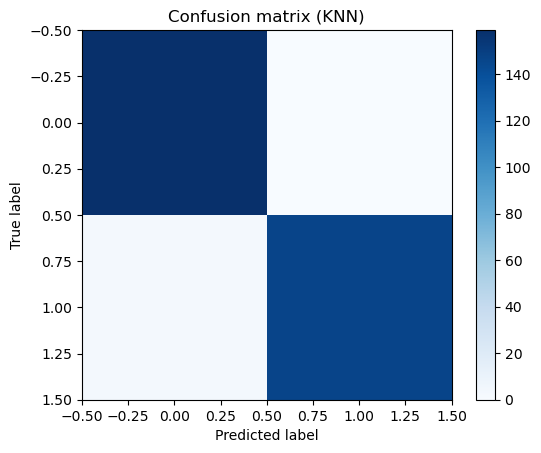

In [95]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameters for KNN
params_knn = {
    "n_neighbors": range(1, 21),  # Adjust the range as needed
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "chebyshev"]
}

# Initialize KNN classifier
classifier_knn = KNeighborsClassifier()

# Initialize GridSearchCV for KNN
model_knn = GridSearchCV(
    estimator=classifier_knn,
    param_grid=params_knn,
    cv=10,
    verbose=10,
    n_jobs=-1,
    scoring="accuracy"
)

# Fit KNN model to training data
model_knn.fit(x_train, y_train)

# Make predictions using the best KNN model
prediction_knn = model_knn.predict(x_test)

# Print evaluation metrics for KNN
print('Accuracy in train (KNN):', metrics.accuracy_score(y_train, model_knn.predict(x_train)))
print('Accuracy in test (KNN):', metrics.accuracy_score(y_test, prediction_knn))

print('Precision in train (KNN):', precision_score(y_train, model_knn.predict(x_train)))
print('Precision in test (KNN):', precision_score(y_test, prediction_knn))

print('Recall in train (KNN):', recall_score(y_train, model_knn.predict(x_train)))
print('Recall in test (KNN):', recall_score(y_test, prediction_knn))

# Cross-validation for KNN
result_train_knn = cross_val_score(estimator=classifier_knn, X=x_train, y=y_train, cv=5, scoring="accuracy")
print("CV Accuracy in train (KNN): %.5f%% (%.5f%%)" % (result_train_knn.mean()*100.0, result_train_knn.std()*100.0))

result_test_knn = cross_val_score(estimator=classifier_knn, X=x_test, y=y_test, cv=5, scoring="accuracy")
print("CV Accuracy in test (KNN): %.5f%% (%.5f%%)" % (result_test_knn.mean()*100.0, result_test_knn.std()*100.0))

# Plot confusion matrix for KNN
cm_knn = confusion_matrix(y_test, prediction_knn)
plt.imshow(cm_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix (KNN)')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Accuracy in train (Decision Tree): 1.0
Accuracy in test (Decision Tree): 0.9707792207792207
Precision in train (Decision Tree): 1.0
Precision in test (Decision Tree): 1.0
Recall in train (Decision Tree): 1.0
Recall in test (Decision Tree): 0.9395973154362416


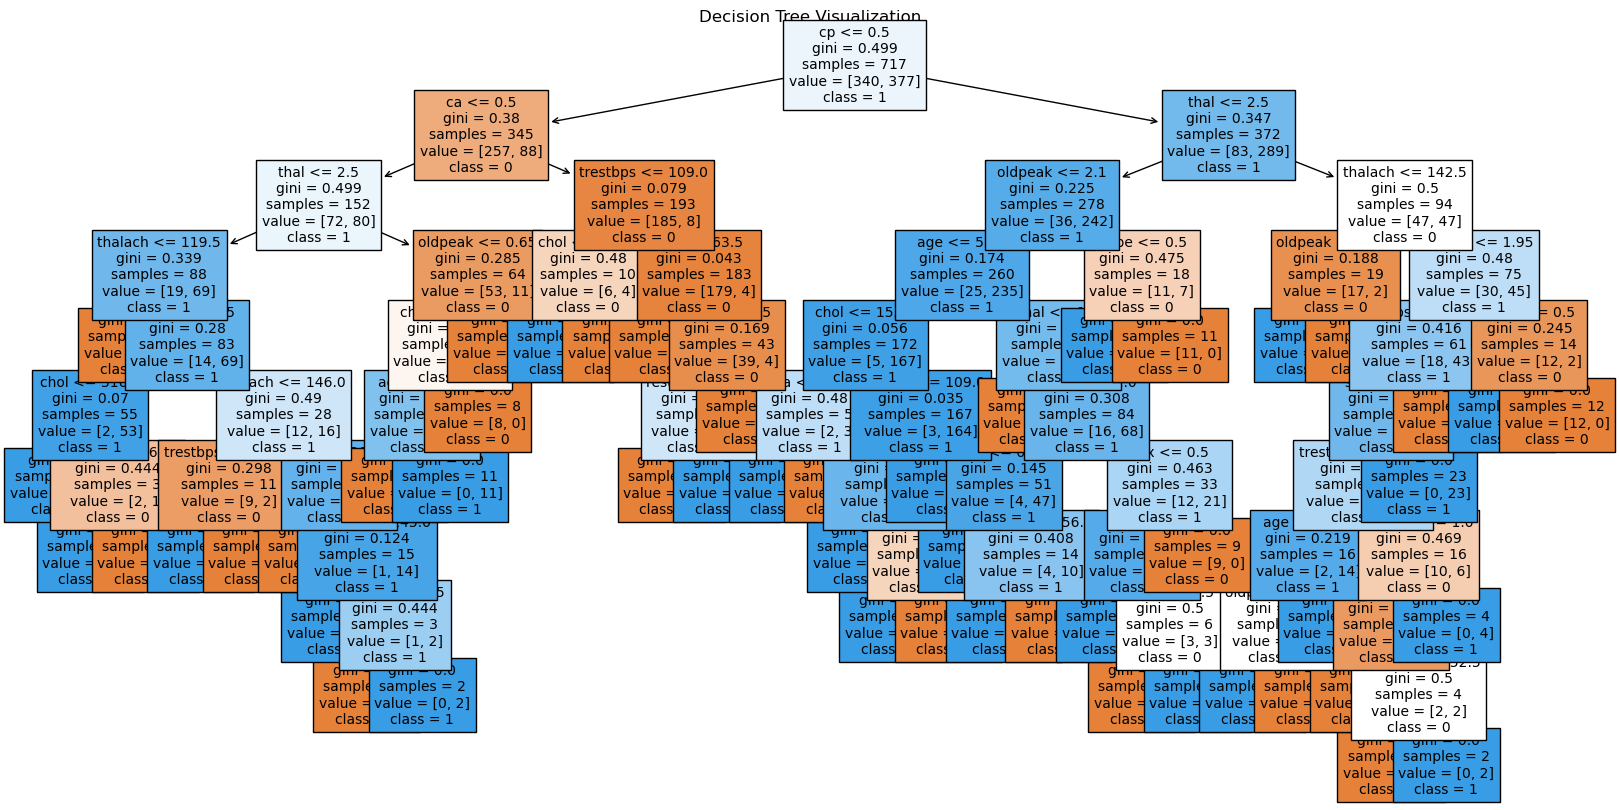

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Initialize Decision Tree classifier
classifier_dt = DecisionTreeClassifier()

# Fit Decision Tree model to training data
classifier_dt.fit(x_train, y_train)

# Make predictions using the Decision Tree model
prediction_dt = classifier_dt.predict(x_test)

# Calculate evaluation metrics for Decision Tree
accuracy_dt_train = metrics.accuracy_score(y_train, classifier_dt.predict(x_train))
accuracy_dt_test = metrics.accuracy_score(y_test, prediction_dt)
precision_dt_train = precision_score(y_train, classifier_dt.predict(x_train))
precision_dt_test = precision_score(y_test, prediction_dt)
recall_dt_train = recall_score(y_train, classifier_dt.predict(x_train))
recall_dt_test = recall_score(y_test, prediction_dt)

# Print evaluation metrics for Decision Tree
print('Accuracy in train (Decision Tree):', accuracy_dt_train)
print('Accuracy in test (Decision Tree):', accuracy_dt_test)
print('Precision in train (Decision Tree):', precision_dt_train)
print('Precision in test (Decision Tree):', precision_dt_test)
print('Recall in train (Decision Tree):', recall_dt_train)
print('Recall in test (Decision Tree):', recall_dt_test)

# Plot confusion matrix for Decision Tree
# Plot Decision Tree

plt.figure(figsize=(20, 10))
plot_tree(classifier_dt, filled=True, feature_names=x_train.columns.tolist(), class_names=['0', '1'], fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

In [107]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Define the Extra Trees classifier
classifier_et = ExtraTreesClassifier(random_state=42)

# Define the hyperparameters grid for GridSearchCV
param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search_et = GridSearchCV(classifier_et, param_grid_et, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_et.fit(x_train, y_train)

# Get the best hyperparameters
best_params_et = grid_search_et.best_params_
print("Best Hyperparameters for Extra Trees:", best_params_et)

# Initialize the Extra Trees classifier with the best hyperparameters
classifier_et_best = ExtraTreesClassifier(random_state=42, **best_params_et)

# Fit the classifier on the training data
classifier_et_best.fit(x_train, y_train)

# Make predictions on the test data
prediction_et = classifier_et_best.predict(x_test)

# Evaluate the classifier
accuracy_et = metrics.accuracy_score(y_test, prediction_et)
precision_et = metrics.precision_score(y_test, prediction_et)
recall_et = metrics.recall_score(y_test, prediction_et)

print('Accuracy (Extra Trees):', accuracy_et)
print('Precision (Extra Trees):', precision_et)
print('Recall (Extra Trees):', recall_et)


Best Hyperparameters for Extra Trees: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy (Extra Trees): 1.0
Precision (Extra Trees): 1.0
Recall (Extra Trees): 1.0
